For text data preprocessing, we followed the following steps:
- Remove punctuation signs to remove ambiguity between words such as ‘terrible!’ and ‘terrible’.
- Convert text to lowercase.
- Remove stop words which create noise in the dataset.
- Remove numbers in the text
- Remove non-english words/ non-meaningful text such as symbols, emails, urls.
- Extract root words from every word in the data (Lemmatizing). 
- Vectorise the data into numeric tensors. 


In [2]:
import pandas as pd
import numpy as np
import json
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
import re
from pathlib import Path   

## Read in the dataset

In [3]:
#financial news 
f_news_df=pd.read_csv("data/Financial_News.csv",encoding='ISO-8859-1', header = None)
#Name columns
f_news_df.columns=["Class", "News"]
#clean dataset and drop rows with na values
f_news_df=f_news_df.dropna()
f_news_df.head()
print(f_news_df.shape)

(4846, 2)


In [4]:
import plotly.express as px
fig = px.bar(f_news_df.groupby('Class').count())
fig.update_layout(
    title='Count per class for Financial Headline Dataset',
)
fig.update_xaxes(title='Sentiment')
fig.update_yaxes(title='Count of values')

In [5]:
#function for text preprocessing
def text_preprocessing(text):
    stop_words = ENGLISH_STOP_WORDS
    wordnet_lemmatizer=WordNetLemmatizer()
    #eng_words = words = set(nltk.corpus.words.words())
    
    ##non-english
    #text=' '.join([word for word in text.split() if word not in (eng_words)])
    #punctuations
    text=text.translate(str.maketrans('', '', string.punctuation))
    #numbers
    translation_table = str.maketrans('', '', string.digits)
    text=text.translate(translation_table)
    #URL
    text=text.replace(r'\s*https?://\S+(\s+|$)', ' ').strip()
    #stopwords
    text=' '.join([word for word in text.split() if word not in (stop_words)])
    #non-english
    #text=' '.join([word for word in text.split() if word not in (eng_words)])
    #tokenise
    text=nltk.word_tokenize(text)
    #lemmatization
    text=([wordnet_lemmatizer.lemmatize(w) for w in text])
    #vectorisation
    vectorizer = TfidfVectorizer(analyzer=lambda x: x)
    return text

In [6]:
f_news_df['News']=f_news_df['News'].apply(lambda x: x.lower())
f_news_df['News']=f_news_df['News'].apply(lambda x:text_preprocessing(x))

In [7]:
f_news_df.head()

,Class,News
0,neutral,"[according, gran, company, plan, production, r..."
1,neutral,"[technopolis, plan, develop, stage, area, squa..."
2,negative,"[international, electronic, industry, company,..."
3,positive,"[new, production, plant, company, increase, ca..."
4,positive,"[according, company, s, updated, strategy, yea..."


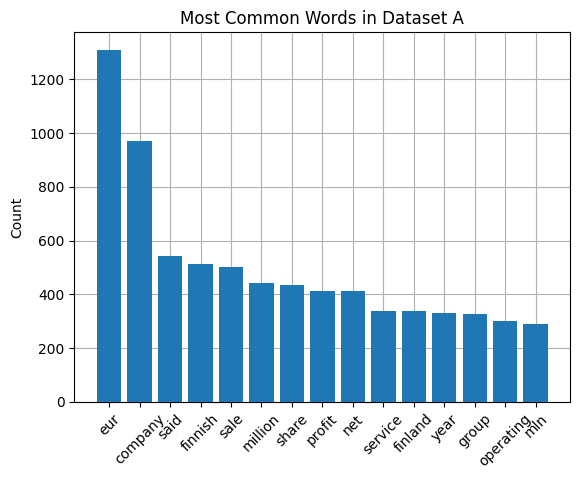

In [14]:
from collections import Counter
import itertools
tokens = [[word for word in item if len(word) > 2] for item in f_news_df['News']]
last_token = list(itertools.chain(*tokens))  
bow_simple = Counter(last_token).most_common(15) 

labels = [item[0] for item in bow_simple]
number = [item[1] for item in bow_simple]
nbars = len(bow_simple)

plt.grid(zorder=0)
plt.bar(np.arange(nbars), number, tick_label=labels, zorder=3)
plt.xticks(rotation=45)
plt.title('Most Common Words in Dataset A')
plt.ylabel('Count')
plt.show()

In [25]:
print(f_news_df.shape)

(4846, 2)


In [26]:
# split into train test sets
X = f_news_df['News']
y = f_news_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
filepath1 = Path('fnews_Xtrain.csv')   
X_train.to_csv(filepath1)
filepath2 = Path('fnews_Xtest.csv')   
X_test.to_csv(filepath2)
filepath3 = Path('fnews_ytrain.csv')   
y_train.to_csv(filepath3)
filepath4 = Path('fnews_ytest.csv')   
y_test.to_csv(filepath4)

In [22]:
#squid game
squidgame_df=pd.read_csv("data/Squid_Game.csv")
#Name columns
#clean dataset and drop rows with na values
squidgame_df=squidgame_df.dropna()
#drop the unused column
squidgame_df.drop(squidgame_df.columns[[0,1,2,4]], axis=1, inplace=True)
squidgame_df.head()
squidgame_df.rename(columns={'Review Rating':'Class', 'Review_body':'Review'}, inplace = True)

In [24]:
squidgame_df['Review'] = squidgame_df['Review'].apply(lambda x:text_preprocessing(x.lower()))

In [25]:
squidgame_df.head()

,Class,Review
0,10/10,"[just, finished, squid, game, korean, tv, that..."
1,9/10,"[multiple, game, actually, accurate, look, way..."
2,10/10,"[runaway, hit, south, korea, centred, seong, g..."
3,5/10,"[went, knowing, absolutely, korean, series, an..."
4,7/10,"[honestly, dont, know, wtf, main, character, n..."


In [26]:
#check unique values
squidgame_df['Class'].unique()
#convert ratings into 3 classes
squidgame_df['Class'] = squidgame_df['Class'].replace(['1/10','2/10','3/10', '4/10'],'negative')
squidgame_df['Class'] = squidgame_df['Class'].replace(['5/10'],'neutral')
squidgame_df['Class'] = squidgame_df['Class'].replace(['6/10','7/10','8/10','9/10','10/10'],'positive')

In [27]:
import plotly.express as px
fig = px.bar(squidgame_df.groupby('Class').count())
fig.update_layout(
    title='Count per class for Review Dataset',
)
fig.update_xaxes(title='Sentiment')
fig.update_yaxes(title='Count of values')

In [28]:
squidgame_df.head()

,Class,Review
0,positive,"[just, finished, squid, game, korean, tv, that..."
1,positive,"[multiple, game, actually, accurate, look, way..."
2,positive,"[runaway, hit, south, korea, centred, seong, g..."
3,neutral,"[went, knowing, absolutely, korean, series, an..."
4,positive,"[honestly, dont, know, wtf, main, character, n..."


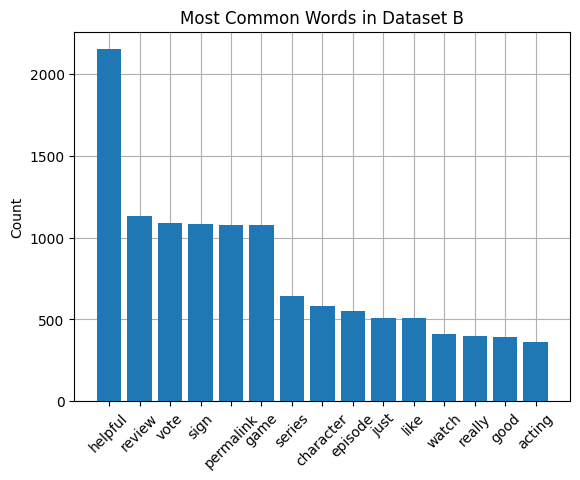

In [29]:
from collections import Counter
import itertools
tokens = [[word for word in item if len(word) > 2] for item in squidgame_df['Review']]
last_token = list(itertools.chain(*tokens))  
bow_simple = Counter(last_token).most_common(15) 

labels = [item[0] for item in bow_simple]
number = [item[1] for item in bow_simple]
nbars = len(bow_simple)

plt.grid(zorder=0)
plt.bar(np.arange(nbars), number, tick_label=labels, zorder=3)
plt.xticks(rotation=45)
plt.title('Most Common Words in Dataset B')
plt.ylabel('Count')
plt.show()

In [40]:
print(squidgame_df.shape)

(1185, 2)


In [54]:
# split into train test sets
X = squidgame_df['Review']
y = squidgame_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# vect_X_train, vect_X_test = text_vect(X_train, X_test)

In [55]:
filepath1 = Path('data/train/squidgame_Xtrain.csv')   
X_train.to_csv(filepath1)
filepath2 = Path('data/test/squidgame_Xtest.csv')   
X_test.to_csv(filepath2)
filepath3 = Path('data/train/squidgame_ytrain.csv')   
y_train.to_csv(filepath3)
filepath4 = Path('data/test/squidgame_ytest.csv')   
y_test.to_csv(filepath4)